# Importing libraries required for the analysis

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px

# Data Pre-Processing

In [13]:
df = pd.read_csv("./data.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Code              3467 non-null   object 
 1   Account_Length_Months   3467 non-null   int64  
 2   Area_Code               3467 non-null   int64  
 3   Intl_Plan               3467 non-null   int64  
 4   VM_Plan                 3467 non-null   int64  
 5   VM_Messages             3467 non-null   int64  
 6   Avg_Day_Minutes         3467 non-null   float64
 7   Avg_Day_Calls           3467 non-null   int64  
 8   Avg_Day_Charge          3467 non-null   float64
 9   Avg_Eve_Minutes         3467 non-null   float64
 10  Avg_Eve_Calls           3467 non-null   int64  
 11  Avg_Eve_Charge          3467 non-null   float64
 12  Avg_Night_Minutes       3467 non-null   float64
 13  Avg_Night_Calls         3467 non-null   int64  
 14  Avg_Night_Charge        3467 non-null   

In [15]:
df.columns

Index(['State_Code', 'Account_Length_Months', 'Area_Code', 'Intl_Plan',
       'VM_Plan', 'VM_Messages', 'Avg_Day_Minutes', 'Avg_Day_Calls',
       'Avg_Day_Charge', 'Avg_Eve_Minutes', 'Avg_Eve_Calls', 'Avg_Eve_Charge',
       'Avg_Night_Minutes', 'Avg_Night_Calls', 'Avg_Night_Charge',
       'Avg_Intl_Minutes', 'Avg_Intl_Calls', 'Avg_Intl_Charge',
       'Customer_Service_Calls', 'Churn'],
      dtype='object')

## Data cleaning


In [50]:
df.isna().sum()
df.duplicated().sum()  # Total number of duplicate rows
df[df.duplicated()]



,State_Code,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,...,Total_Calls,Total_Charge,AON,Day_Rate,Eve_Rate,Night_Rate,Intl_Rate,day_usage,eve_usage,night_usage


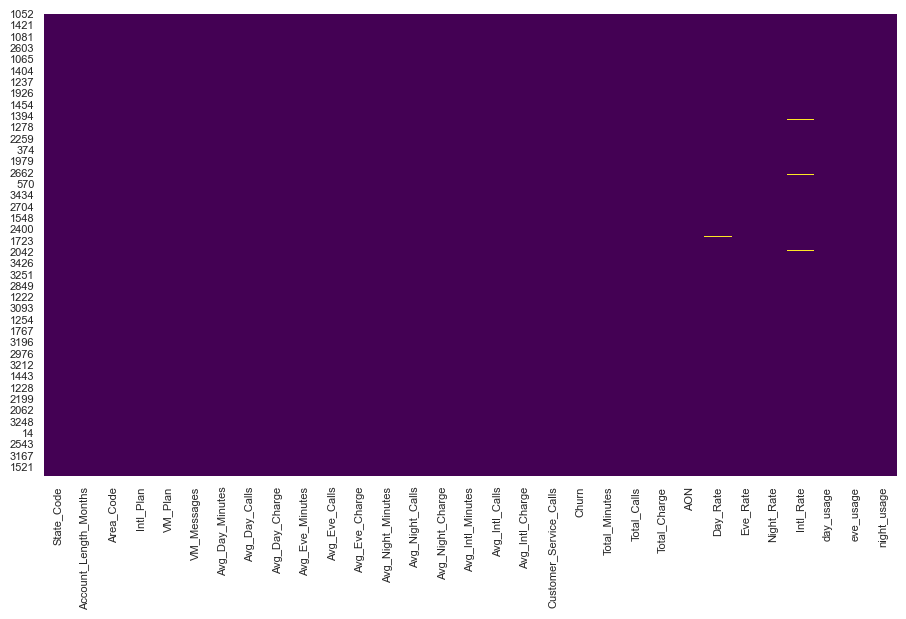

In [51]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()


In [17]:
df.duplicated().sum()

0

---
### There are no null values in the dataset and no duplicates, the data is clean.

---

In [18]:
df.describe()

,Account_Length_Months,Area_Code,Intl_Plan,VM_Plan,VM_Messages,Avg_Day_Minutes,Avg_Day_Calls,Avg_Day_Charge,Avg_Eve_Minutes,Avg_Eve_Calls,Avg_Eve_Charge,Avg_Night_Minutes,Avg_Night_Calls,Avg_Night_Charge,Avg_Intl_Minutes,Avg_Intl_Calls,Avg_Intl_Charge,Customer_Service_Calls,Churn
count,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000
mean,100.606288,436.620710,0.096048,0.262475,7.695991,195.642440,105.970003,36.037067,214.303825,105.993078,25.049262,203.181030,105.335449,10.162132,11.790730,4.827517,3.076752,1.571676,0.143640
std,39.841338,42.021174,0.294700,0.440043,13.509946,58.679758,21.163917,10.808548,53.649726,21.014681,6.270818,50.799019,21.255113,2.540708,3.186702,2.894911,0.831318,1.318664,0.350775
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.680000,13.000000,5.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,154.810000,92.000000,28.510000,178.620000,92.000000,20.880000,169.570000,91.000000,8.480000,9.780000,3.000000,2.560000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,195.780000,106.000000,36.070000,214.310000,106.000000,25.050000,203.750000,106.000000,10.190000,11.960000,4.000000,3.120000,1.000000,0.000000
75%,127.000000,415.000000,0.000000,1.000000,17.000000,234.540000,120.000000,43.200000,250.310000,121.000000,29.260000,237.570000,119.000000,11.880000,13.800000,7.000000,3.600000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,52.000000,380.000000,175.000000,70.000000,376.750000,180.000000,44.040000,400.000000,185.000000,20.000000,23.000000,22.000000,6.000000,9.000000,1.000000


In [19]:
df["Total_Minutes"] = (df["Avg_Day_Minutes"] + df["Avg_Eve_Minutes"] + df["Avg_Night_Minutes"])
df["Total_Calls"] = (df["Avg_Day_Calls"] + df["Avg_Eve_Calls"] + df["Avg_Night_Calls"])
df["Total_Charge"] = (df["Avg_Day_Charge"] + df["Avg_Eve_Charge"] + df["Avg_Night_Charge"])

In [20]:
df[["Total_Minutes", "Total_Calls", "Total_Charge"]].describe()

,Total_Minutes,Total_Calls,Total_Charge
count,3467.000000,3467.000000,3467.000000
mean,613.127294,317.298529,71.248460
std,94.328388,36.413356,12.752973
min,289.380000,204.000000,28.460000
25%,549.545000,293.000000,62.490000
50%,613.800000,318.000000,71.390000
75%,677.065000,342.000000,79.830000
max,924.150000,434.000000,114.250000


In [21]:
def aon_slab(months):
    if months <= 3: return "00 - 03"
    elif months > 3 and months <= 6: return "04 - 06"
    elif months > 6 and months <= 12: return "07 - 12"
    elif months > 12 and months <= 24: return "13 - 24"
    elif months > 24 and months <= 36: return "25 - 36"
    elif months > 36 and months <= 60: return "37 - 60"
    elif months > 60 and months <= 120: return "61 - 120"
    elif months > 120: return "More than 10 years"

In [22]:
df["AON"] = df["Account_Length_Months"].apply(aon_slab)

In [23]:
df["Day_Rate"] = df["Avg_Day_Charge"]/df["Avg_Day_Minutes"]
df["Eve_Rate"] = df["Avg_Eve_Charge"]/df["Avg_Eve_Minutes"]
df["Night_Rate"] = df["Avg_Night_Charge"]/df["Avg_Night_Minutes"]
df["Intl_Rate"] = df["Avg_Intl_Charge"]/df["Avg_Intl_Minutes"]

In [24]:
df[["Day_Rate", "Eve_Rate", "Night_Rate"]].describe()

,Day_Rate,Eve_Rate,Night_Rate
count,3465.000000,3467.000000,3466.000000
mean,0.184199,0.116887,0.050015
std,0.000036,0.000027,0.000025
min,0.183805,0.116785,0.049808
25%,0.184181,0.116869,0.050000
50%,0.184198,0.116887,0.050015
75%,0.184216,0.116904,0.050030
max,0.185053,0.117020,0.050169


In [25]:
df = df.sort_values("Account_Length_Months")

In [26]:
df_churn = df[df["Churn"] == 1]
df_not_churn = df[df["Churn"] == 0]

# Demographic Analysis - EDA


In [27]:
df_pop = df["State_Code"].value_counts()/len(df["State_Code"]) * 100
df_pop = pd.DataFrame(df_pop)
df_pop.rename(columns = {'count':'Percentage'}, inplace = True)

In [28]:
fig = px.choropleth(df_pop,
                    locations=df_pop.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage',
                    color_continuous_scale="Viridis_r", 
                    title= "Tele-Density - Operator A"
                    )
fig.update_layout(title_x=0.5)
fig.show()

In [29]:
state_churn_pop = df_churn.groupby("State_Code")["Churn"].value_counts().reset_index()
state_churn_pop["Percentage"] = state_churn_pop["count"]/state_churn_pop["count"].sum()*100
state_churn_pop = state_churn_pop.sort_values("Percentage", ascending=False).reset_index(drop=True)

In [30]:
fig = px.choropleth(state_churn_pop,
                    locations="State_Code", 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage',
                    color_continuous_scale="Viridis_r", 
                    title= "National Churn Ratio - State Wise"
                    )
fig.update_layout(title_x=0.5)
fig.show()

--- 
### Statewise Contribution to National Churn
### Maximum churn is coming from state - New York (4.81%)

---

In [31]:
fig = px.choropleth(locations=df.groupby(['State_Code'])['Churn'].mean().sort_values(ascending=False).index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color=df.groupby(['State_Code'])['Churn'].mean().sort_values(ascending=False)*100,
                    color_continuous_scale="Viridis_r", 
                    title= "% Churn to Subscriber Base - State Wise",
                    labels={"color": "Percentage"}
                    )
fig.update_layout(title_x=0.5)
fig.show()

---
### Churn % to overall customer at the state. 
### *Alarming* situation in state California as it has lowest tele-density with second highest churn rate.

---

# Feature Analysis

/var/folders/y9/5mj0xxqn1xld71z_d25493sr0000gn/T/ipykernel_86808/2052701726.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



,AON,Distribution
0,00 - 03,14
1,04 - 06,5
2,07 - 12,16
3,13 - 24,53
4,25 - 36,97
5,37 - 60,364
6,61 - 120,1858
7,More than 10 years,1060


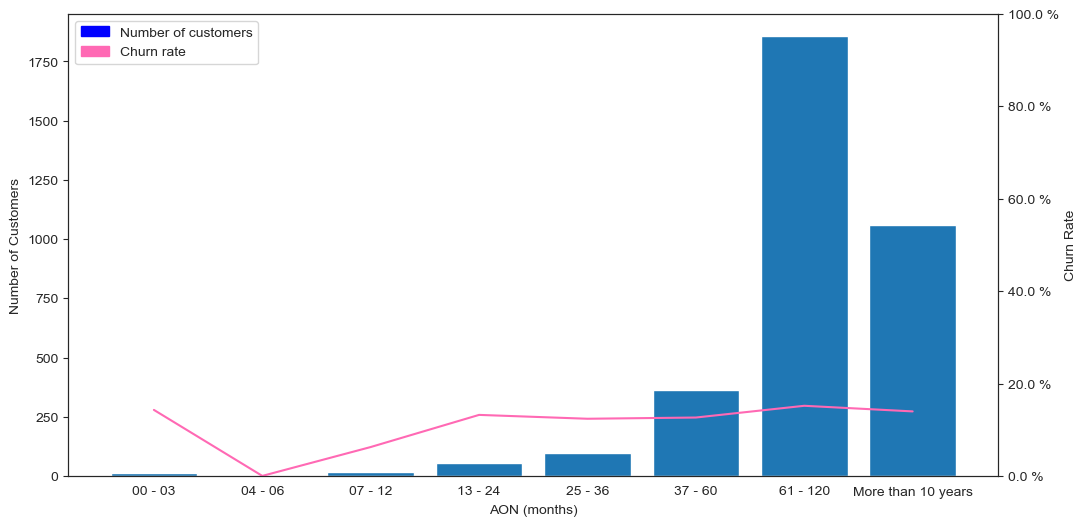

In [32]:
sns.set_style("white")

fig, ax1 = plt.subplots(figsize=(12, 6))
temp1 = df.groupby("AON")["Churn"].count()
plt.bar(x=temp1.index, height=temp1.values, label="Number of customers" )
ax1.set_ylabel("Number of Customers")
ax1.set_xlabel("AON (months)")

ax2 = ax1.twinx()
ax2.set_ylim(0, 100)
temp2 = (pd.crosstab(df["AON"], df["Churn"], normalize="index")[1]*100).reset_index()
plt.plot(temp2["AON"], temp2[1], c="hotpink", label="Churn Rate")
vals = ax2.get_yticks()
ax2.set_ylabel("Churn Rate")
ax2.set_yticklabels(['{} %'.format(x) for x in vals])

blue_patch = mpatches.Patch(color='blue', label='Number of customers')
pink_patch = mpatches.Patch(color='hotpink', label='Churn rate')
plt.legend(handles=[blue_patch, pink_patch], loc="upper left");

df.groupby("AON")["Churn"].count().reset_index().rename(columns={"Churn": "Distribution"})

---
### Based on AON analysis of customer distribution it is observed that fresh acquistion is not healthy.

--- 

#### Styling graphs globally

In [33]:
sns.set_style("whitegrid")
sns.color_palette("deep")
# plt.rc("axes.spines", top=False, right=False)
plt.rc("axes", labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=13)
plt.rc("figure", figsize=(11,6))

Churn,AON,False,True
0,00 - 03,85.71,14.29
1,04 - 06,100.00,0.00
2,07 - 12,93.75,6.25
3,13 - 24,86.79,13.21
4,25 - 36,87.63,12.37
5,37 - 60,87.36,12.64
6,61 - 120,84.82,15.18
7,More than 10 years,86.04,13.96


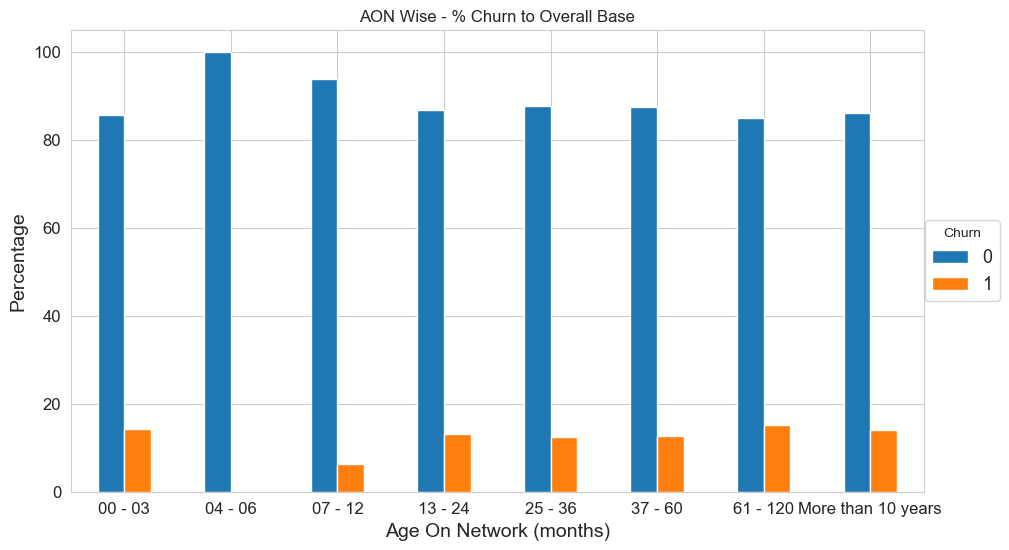

In [34]:
aon = (pd.crosstab(df.AON, df.Churn, normalize="index")*100).round(2).reset_index()
aon.plot(kind="bar", x="AON", figsize=(11, 6))
plt.xticks(rotation=0)
plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), title="Churn")
plt.ylabel("Percentage")
plt.xlabel("Age On Network (months)")
plt.title("AON Wise - % Churn to Overall Base")
aon.rename(columns = {aon.columns[1]: "False", aon.columns[2]: "True"})

,AON,count
0,00 - 03,0.40
1,07 - 12,0.20
2,13 - 24,1.41
3,25 - 36,2.41
4,37 - 60,9.24
5,61 - 120,56.63
6,More than 10 years,29.72


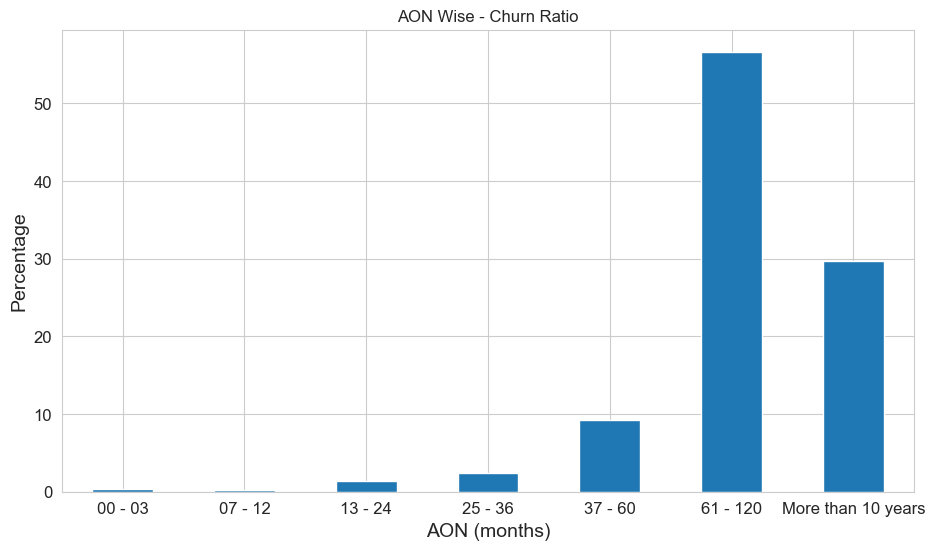

In [35]:
a = ((df_churn["AON"].value_counts(sort=False))/(df_churn["AON"].value_counts().sum())*100).plot(kind="bar", figsize=(11, 6))
plt.xticks(rotation=0)
plt.xlabel("AON (months)")
plt.ylabel("Percentage")
plt.title("AON Wise - Churn Ratio");
((df_churn["AON"].value_counts(sort=False))/(df_churn["AON"].value_counts().sum())*100).round(2).reset_index().rename(columns={})

---
### Customer of belonging to the AON slab of 61-120 months are the maximum contributors to overall churn.

---

## International Plan customer analysis

Churn,0,1
Intl_Plan,,
0,88.640715,11.359285
1,57.357357,42.642643


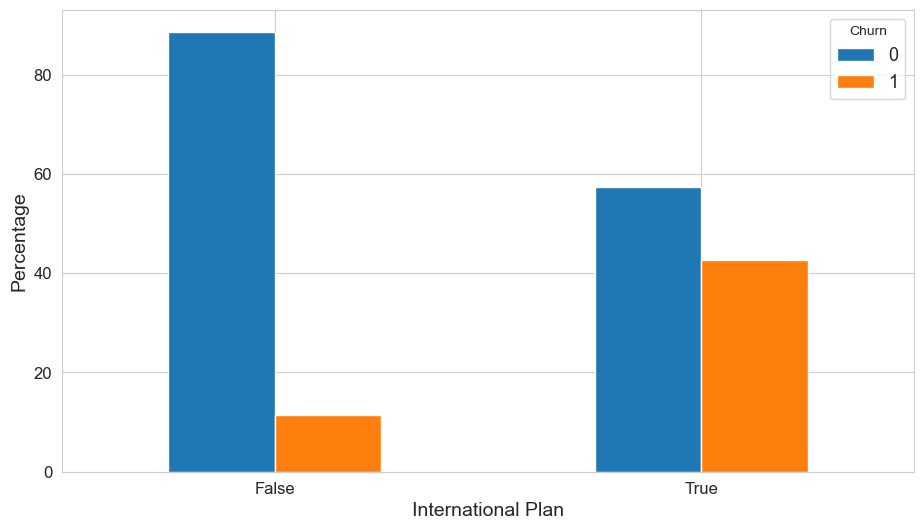

In [36]:
(pd.crosstab(df["Intl_Plan"], df["Churn"], normalize="index")*100).plot.bar();
plt.xticks([0,1], labels=["False", "True"], rotation=0)
plt.ylabel("Percentage")
plt.xlabel("International Plan");
(pd.crosstab(df["Intl_Plan"], df["Churn"], normalize="index")*100)

---
### Churn is high for customers with international plan.

---

           Avg_Intl_Charge  Avg_Intl_Calls  Avg_Intl_Minutes  Intl_Rate
Intl_Plan                                                              
0                     3.07            4.82             11.77   0.260958
1                     3.13            4.94             12.00   0.260908


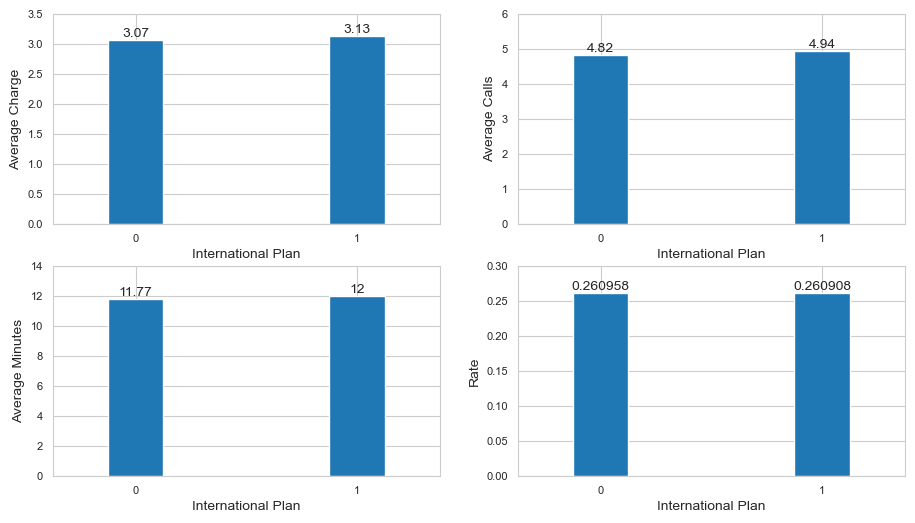

In [37]:
tmp1 = df.groupby("Intl_Plan")["Avg_Intl_Charge"].mean().round(2)
tmp2 = df.groupby("Intl_Plan")["Avg_Intl_Calls"].mean().round(2)
tmp3 = df.groupby(["Intl_Plan"])["Avg_Intl_Minutes"].mean().round(2)
tmp4 = df.groupby("Intl_Plan")["Intl_Rate"].mean()
tmp = pd.concat([tmp1, tmp2, tmp3, tmp4], axis=1)
print(tmp)

plt.rc("axes", labelsize=10)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc("figure", figsize=(11,6))

fig, axes = plt.subplots(nrows=2, ncols=2)
ax1 = tmp1.plot(kind="bar", ax = axes[0, 0], width=0.25, xlabel="International Plan", ylabel="Average Charge", ylim=(0, 3.5), rot=0)
ax1.bar_label(ax1.containers[0], label_type='edge')

ax2 = tmp2.plot(kind="bar", ax = axes[0, 1], width=0.25, xlabel="International Plan", ylabel="Average Calls", ylim=(0, 6), rot=0)
ax2.bar_label(ax2.containers[0], label_type='edge')

ax3 = tmp3.plot(kind="bar", ax = axes[1, 0], width=0.25, xlabel="International Plan", ylabel="Average Minutes", ylim=(0, 14), rot=0)
ax3.bar_label(ax3.containers[0], label_type='edge')

ax4 = tmp4.plot(kind="bar", ax = axes[1, 1], width=0.25, xlabel="International Plan", ylabel="Rate", ylim=(0, 0.3), rot=0)
ax4.bar_label(ax4.containers[0], label_type='edge');

---
### Inline with industry trends customers with international plan have higher international usage.
### There is no major difference in the *revenue* generated by an international plan customer versus non-interntional plan.
### The call rate offered on the international plan is similar to a non-plan tariff, hence it could be a reason for higher churn of customers with international plan. 

---
### Churn Count of Customers with International Usage but No Active International Plan
---

In [38]:
df[(df["Intl_Plan"] == 0) & (df["Avg_Intl_Calls"] != 0)]["Churn"].value_counts().reset_index()

,Churn,count
0,0,2759
1,1,356


## Voice Mail Plan Analysis

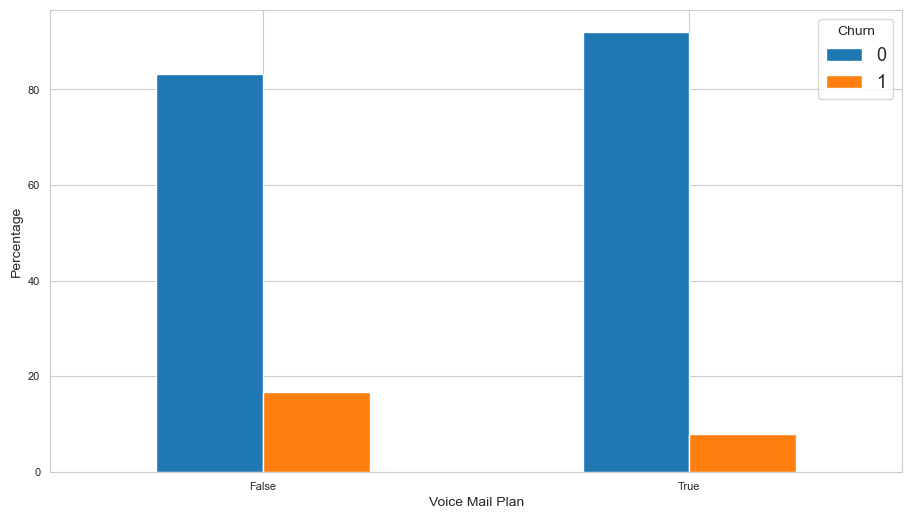

In [39]:
(pd.crosstab(df["VM_Plan"], df["Churn"], normalize="index")*100).plot.bar()
plt.xticks([0,1], labels=["False", "True"], rotation=0)
plt.xlabel("Voice Mail Plan")
plt.ylabel("Percentage");

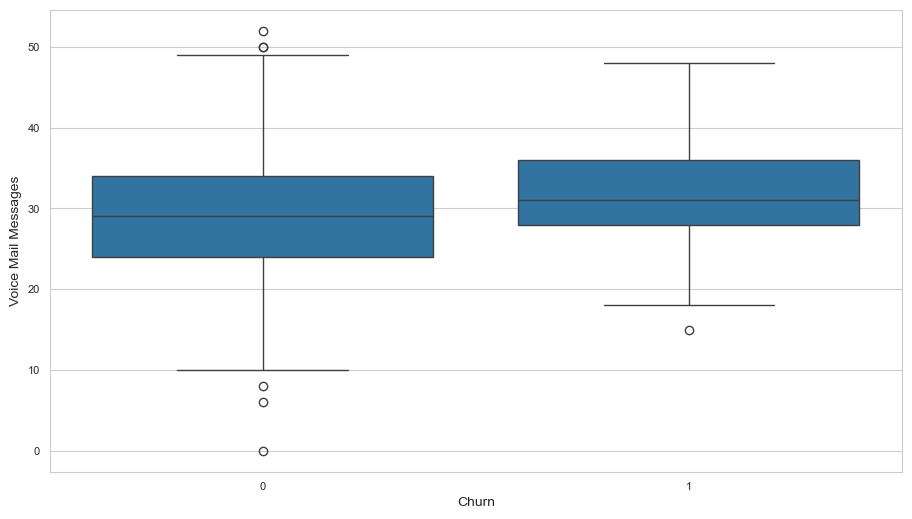

In [40]:
a = df[df["VM_Plan"] == 1].sort_values("VM_Messages", ascending=False)
sns.boxplot(data=a, x="Churn", y="VM_Messages")
plt.ylabel("Voice Mail Messages");

---
### Customers with higher voice mail messages are churning more, which can be an indicative parameter to further validate network parameters resulting into call drops and unreachability.
---

## Customer Service Calls Analysis

In [41]:
tmp1 = ((df.groupby("Customer_Service_Calls").count()/len(df["Customer_Service_Calls"]))["Churn"]*100).round(2)
tmp2 = ((pd.crosstab(df["Customer_Service_Calls"], df["Churn"], normalize="index")*100)[1]).round(2)
pd.concat([tmp1, tmp2], axis=1).rename(columns={"Churn": "Total_Population", 1: "Churn_Percentage"})

,Total_Population,Churn_Percentage
Customer_Service_Calls,,
0,20.65,11.31
1,35.71,11.15
2,22.15,11.33
3,13.56,11.49
4,4.82,43.11
5,2.02,61.43
6,0.69,66.67
7,0.32,45.45
8,0.03,0.00


---
### Probability of customers churning out is high where calls made to customer service are greater than 3.
### Out of the 20% customer base who have not made a customer service call, 11% have churned out. Hence difficult to analyse the reason of churn for these customers.
---

In [42]:
df["day_usage"]=df["Avg_Day_Minutes"]/df["Total_Minutes"]*100
df["eve_usage"]=df["Avg_Eve_Minutes"]/df["Total_Minutes"]*100
df["night_usage"]=df["Avg_Night_Minutes"]/df["Total_Minutes"]*100

In [43]:
perc = (df[(df["day_usage"] > df["eve_usage"]) & (df["day_usage"] > df["night_usage"])]["Churn"].mean()*100).round(2)
print("% Churn of customers having more usage during the day = {}".format(perc))

% Churn of customers having more usage during the day = 22.16


In [44]:
perc = (df[(df["eve_usage"] > df["day_usage"]) & (df["eve_usage"] > df["night_usage"])]["Churn"].mean()*100).round(2)
print("% Churn of customers having more usage during the evening = {}".format(perc))

% Churn of customers having more usage during the evening = 12.62


In [45]:
perc =(df[(df["night_usage"] > df["eve_usage"]) & (df["night_usage"] > df["eve_usage"])]["Churn"].mean()*100).round(2)
print("% Churn of customers having more usage during the night = {}".format(perc))

% Churn of customers having more usage during the night = 13.06


---
### Out of total universe of making high usage during day time, 22.16 % have churned out as compared to 12.62 and 13.06 for evening and night high usage base respectively indicating that they are getting a better tariff for day usage from some other operator.
---

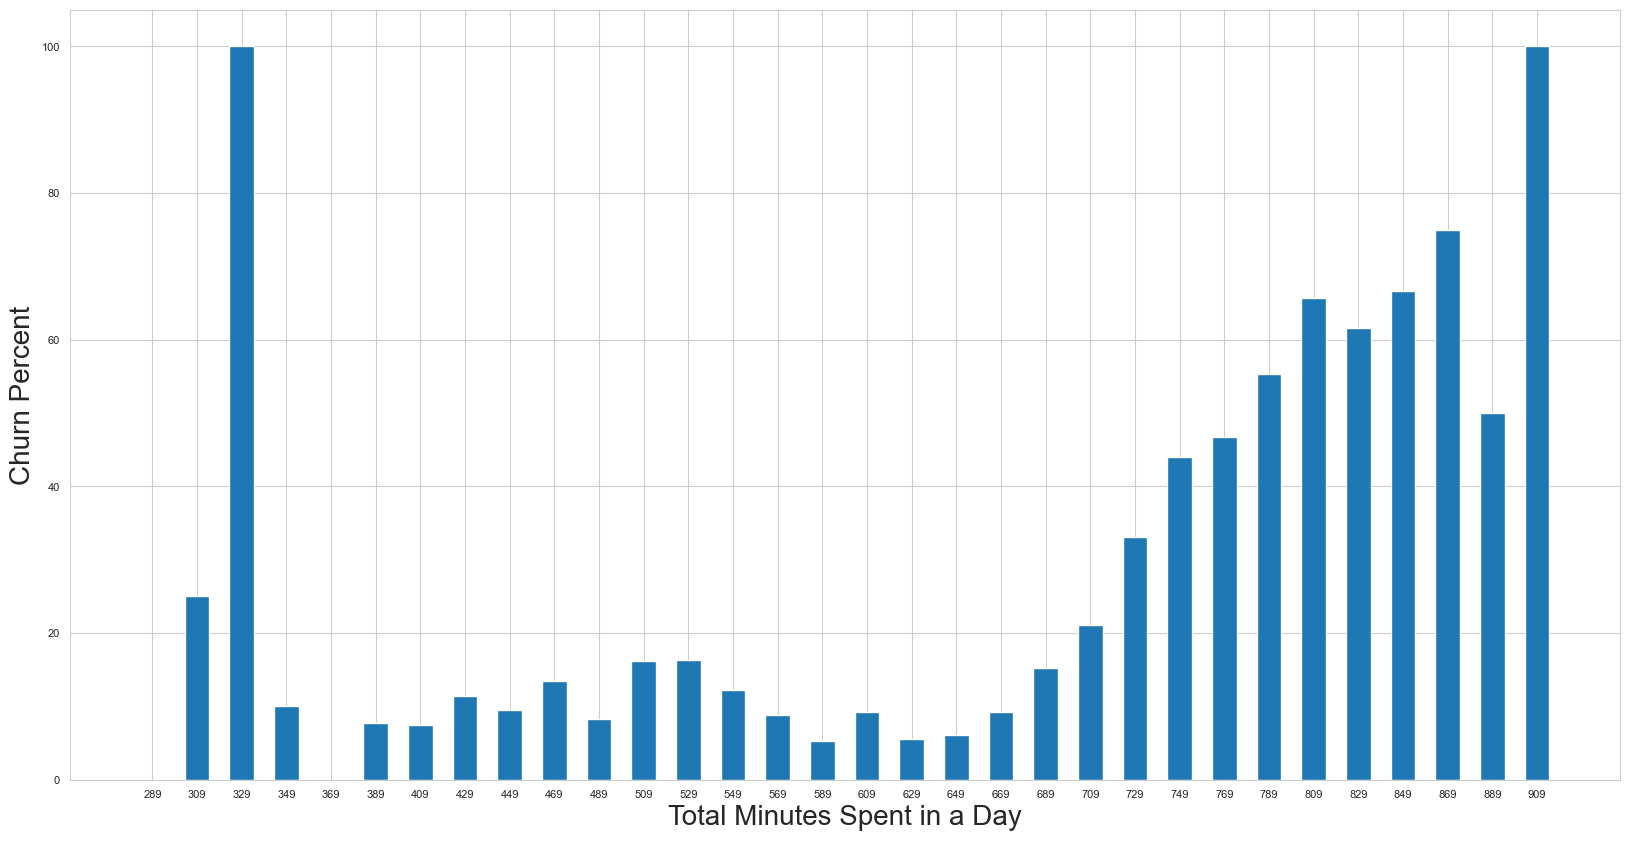

In [46]:
percentage=[]
min_value = int(df["Total_Minutes"].min())
max_value = int(df["Total_Minutes"].max())
for i in range(min_value,max_value,20):
    percentage.append(df[(df["Total_Minutes"]>=i) & (df["Total_Minutes"]<i+20)]["Churn"].mean()*100)
plt.figure(figsize=(20,10))
plt.bar(np.arange(min_value,max_value,20), percentage, width=11)
plt.xticks(np.arange(min_value,max_value,20))
plt.ylabel('Churn Percent', fontsize=20)
plt.xlabel('Total Minutes Spent in a Day', fontsize=20);

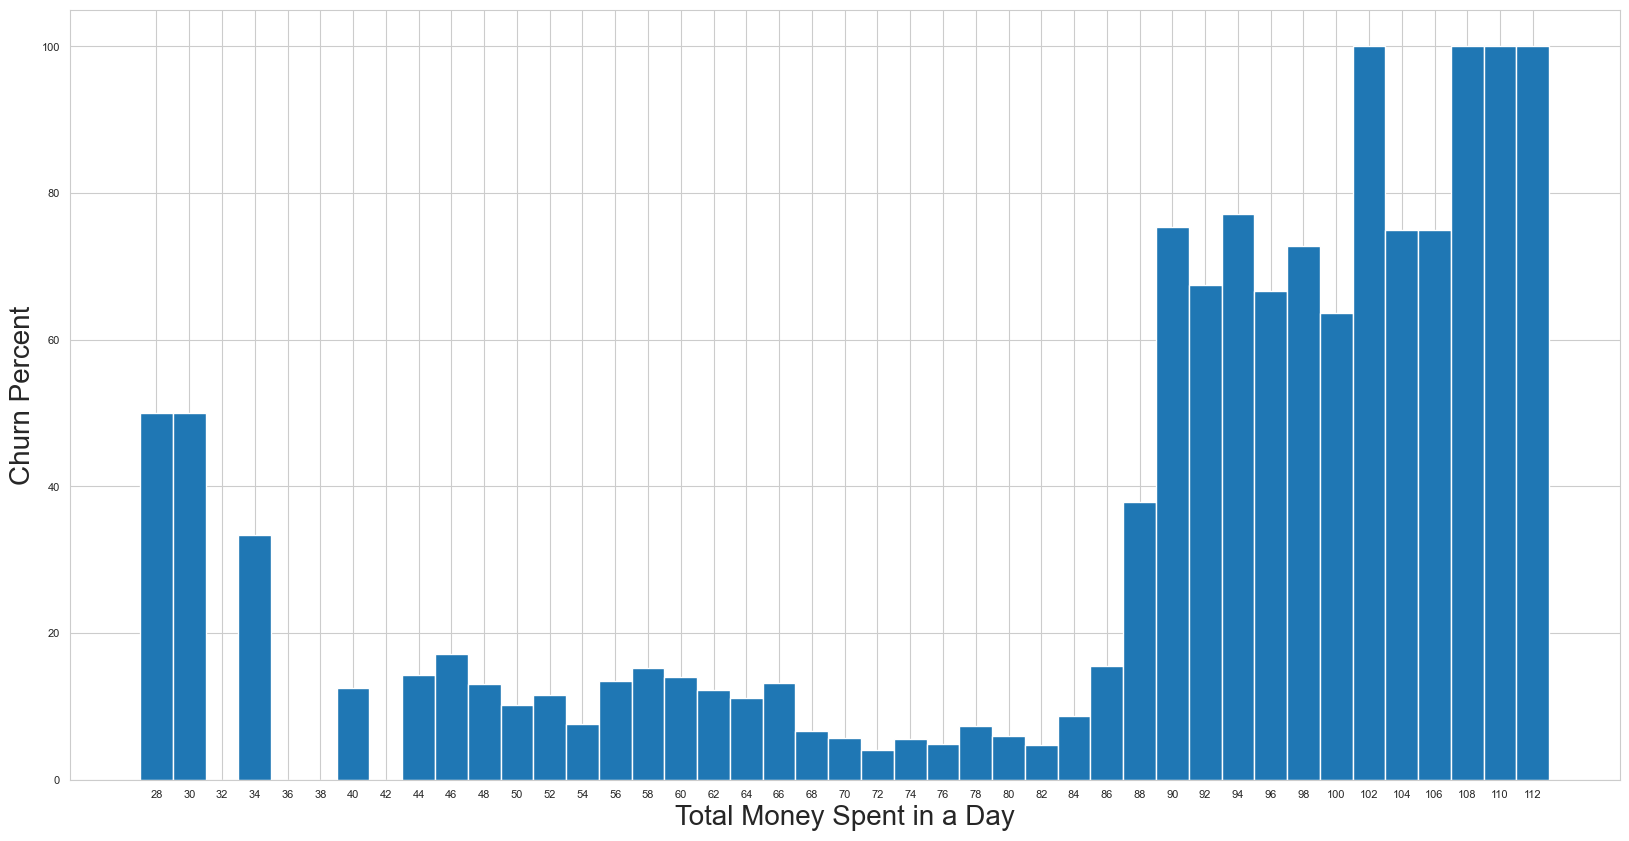

In [47]:
percentage=[]
min_value = int(df["Total_Charge"].min())
max_value = int(df["Total_Charge"].max())
for i in range(min_value,max_value,2):
    percentage.append(df[(df["Total_Charge"]>=i) & (df["Total_Charge"]<i+2)]["Churn"].mean()*100)
plt.figure(figsize=(20,10))
plt.bar(np.arange(min_value,max_value,2), percentage, width=2)
plt.xticks(np.arange(min_value,max_value,2))
plt.ylabel('Churn Percent', fontsize=20)
plt.xlabel('Total Money Spent in a Day', fontsize=20);


---
### Assuming these are post paid customers, there is a trend of high usage before the customers churn resulting into default and bad debts for the operator.
---